In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
imdb, info = tfds.load("imdb_reviews", with_info = True, as_supervised = True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteYSRM20/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteYSRM20/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteYSRM20/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [0]:
train, test = imdb['train'], imdb['test']

In [0]:
training_sentences = []
testing_sentences = []

In [0]:
training_labels = []
testing_labels = []

In [0]:
for s, l in train:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())

In [0]:
for s, l in test:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())

In [0]:
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [0]:
v_size = 10000
embed_dim = 16
max_len = 20
trunc_type = 'post'
oov_tok = '<OOV>'

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [0]:
tokenizer = Tokenizer(v_size, oov_token=oov_tok)


In [0]:
tokenizer.fit_on_texts(training_sentences)

In [0]:
word_index = tokenizer.word_index

In [15]:
word_index

{'<OOV>': 1,
 'the': 2,
 'and': 3,
 'a': 4,
 'of': 5,
 'to': 6,
 'is': 7,
 'br': 8,
 'in': 9,
 'it': 10,
 'i': 11,
 'this': 12,
 'that': 13,
 'was': 14,
 'as': 15,
 'for': 16,
 'with': 17,
 'movie': 18,
 'but': 19,
 'film': 20,
 "'s": 21,
 'on': 22,
 'you': 23,
 'not': 24,
 'are': 25,
 'his': 26,
 'he': 27,
 'have': 28,
 'be': 29,
 'one': 30,
 'all': 31,
 'at': 32,
 'by': 33,
 'they': 34,
 'an': 35,
 'who': 36,
 'so': 37,
 'from': 38,
 'like': 39,
 'her': 40,
 "'t": 41,
 'or': 42,
 'just': 43,
 'there': 44,
 'about': 45,
 'out': 46,
 "'": 47,
 'has': 48,
 'if': 49,
 'some': 50,
 'what': 51,
 'good': 52,
 'more': 53,
 'very': 54,
 'when': 55,
 'she': 56,
 'up': 57,
 'can': 58,
 'b': 59,
 'time': 60,
 'no': 61,
 'even': 62,
 'my': 63,
 'would': 64,
 'which': 65,
 'story': 66,
 'only': 67,
 'really': 68,
 'see': 69,
 'their': 70,
 'had': 71,
 'were': 72,
 'me': 73,
 'well': 74,
 'we': 75,
 'than': 76,
 'much': 77,
 'been': 78,
 'get': 79,
 'bad': 80,
 'will': 81,
 'people': 82,
 'do': 83,

In [16]:
len(word_index)

86539

In [0]:
sequences = tokenizer.texts_to_sequences(training_sentences)

In [19]:
len(sequences)

25000

In [0]:
padded = pad_sequences(sequences, maxlen = max_len, truncating = trunc_type)

In [21]:
padded

array([[  59,   12,   14, ...,  197,   25,   88],
       [ 256,   28,   78, ...,    5,  183,  599],
       [   1, 6175,    2, ...,  746,  361,   15],
       ...,
       [7629,   37,   11, ...,   11,  481,    6],
       [2677,   11,  216, ..., 1477,    1,    9],
       [3875,    5,   31, ...,    5,  686,    1]], dtype=int32)

In [22]:
padded.shape

(25000, 20)

In [0]:
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)

In [0]:
testing_padded = pad_sequences(testing_sequences, maxlen = max_len)

In [25]:
testing_padded.shape

(25000, 20)

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(v_size, embed_dim, input_length=max_len),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

In [0]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 16)            160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 150       
Total params: 160,558
Trainable params: 160,558
Non-trainable params: 0
_________________________________________________________________


In [32]:
num_epochs = 20
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/20
782/782 [==============================] - 3s 4ms/step - loss: 0.8025 - accuracy: 0.5676 - val_loss: 0.6553 - val_accuracy: 0.6527
Epoch 2/20
782/782 [==============================] - 3s 4ms/step - loss: 0.5684 - accuracy: 0.7161 - val_loss: 0.5702 - val_accuracy: 0.6977
Epoch 3/20
782/782 [==============================] - 3s 4ms/step - loss: 0.4783 - accuracy: 0.7741 - val_loss: 0.5517 - val_accuracy: 0.7125
Epoch 4/20
782/782 [==============================] - 3s 4ms/step - loss: 0.4384 - accuracy: 0.7976 - val_loss: 0.5653 - val_accuracy: 0.7096
Epoch 5/20
782/782 [==============================] - 3s 4ms/step - loss: 0.4121 - accuracy: 0.8133 - val_loss: 0.5894 - val_accuracy: 0.7030
Epoch 6/20
782/782 [==============================] - 3s 4ms/step - loss: 0.3935 - accuracy: 0.8201 - val_loss: 0.6107 - val_accuracy: 0.7031
Epoch 7/20
782/782 [==============================] - 3s 4ms/step - loss: 0.3775 - accuracy: 0.8294 - val_loss: 0.6380 - val_accuracy: 0.6958
Epoch 

In [0]:
e = model.layers[0]
weights = e.get_weights()[0]

In [34]:
weights

array([[-3.55324382e-03, -9.36358888e-03, -3.61064188e-02, ...,
        -1.02199934e-01, -1.88105822e-01, -4.00638655e-02],
       [ 1.73023671e-01,  3.03911865e-01,  2.23489180e-01, ...,
        -2.31550336e-01, -2.55440116e-01, -1.96547642e-01],
       [ 2.44137913e-01,  3.02902848e-01,  2.55451471e-01, ...,
        -2.59374738e-01, -2.70602793e-01, -2.15653598e-01],
       ...,
       [ 1.73686258e-02, -1.54776573e-02,  1.65913813e-02, ...,
         4.16621007e-02,  2.07941793e-02,  4.20439988e-04],
       [ 4.21564102e-01, -4.12379563e-01,  3.79263550e-01, ...,
        -4.42940563e-01, -3.90012056e-01,  3.45693558e-01],
       [-3.51242810e-01,  4.40162659e-01, -3.84301215e-01, ...,
         3.45732063e-01,  3.88174623e-01, -3.72013211e-01]], dtype=float32)

In [35]:
weights.shape

(10000, 16)

In [0]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

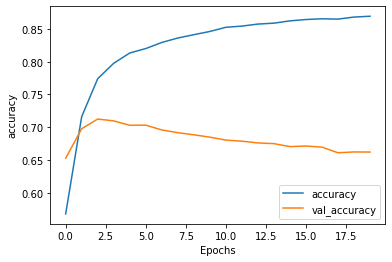

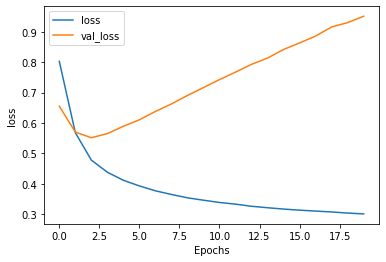

In [37]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")